# Decision Tree Classification

<a id="reference"></a>

*Decision Tree is a tree shaped diagram used to determine a course of action. Each branch of the tree represenets a possible decision, occurance or reaction.*


### Advantages & Disadvantages of Decision Tree
***

**Advantages:**
* Simple to understand and visualize, you can see exactly what's going on
* Little effort required for data preparation
* Handles both numerical and categorical data 

**Disadvantages:**
* Overfitting - *Occurs when algorithm captures noise in the dataset*
* High Variance - *Model can get unstable due to small variation in the dataset*
* Low biased - *Complicated Decision Tree can have a low bias which makes it difficult for the modle to work with new dataset*


In [14]:
# Plotting.
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.datasets import load_digits
import seaborn as sns
import graphviz
from sklearn import tree


In [2]:
# col_names = ['X', 'Y', 'Month', 'Day', 'FFMC', 'DMC', 'DC', 'ISI', 'Temp', 'RH', 'Wind', 'Rain', 'Area']
#data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv")
data = load_digits()

dataset = pd.DataFrame(data=data['data'], columns=data['feature_names'])
dataset

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [3]:
X = dataset.copy()
y= data.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

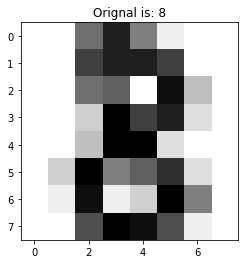

In [4]:
def view_digit(index):
    plt.imshow(data.images[index] , cmap = plt.cm.gray_r , interpolation = 'nearest')
    plt.title('Orignal is: '+ str(data.target[index]))
    plt.show()
view_digit(8)

In [18]:
clf = DecisionTreeClassifier(criterion = 'gini',max_depth=3, random_state=42)
clf = clf.fit(X_train, y_train)

predicted = clf.predict(X_test)


## Visualizing The Tree
***

In [11]:
from sklearn.tree import export_graphviz
export_graphviz(clf, out_file ="tree.dot", impurity=False, filled=True)

In [12]:
with open("tree.dot") as reader:
    dot_file = reader.read()

graphviz.Source(dot_file, format="png").render("tree")

'tree.png'

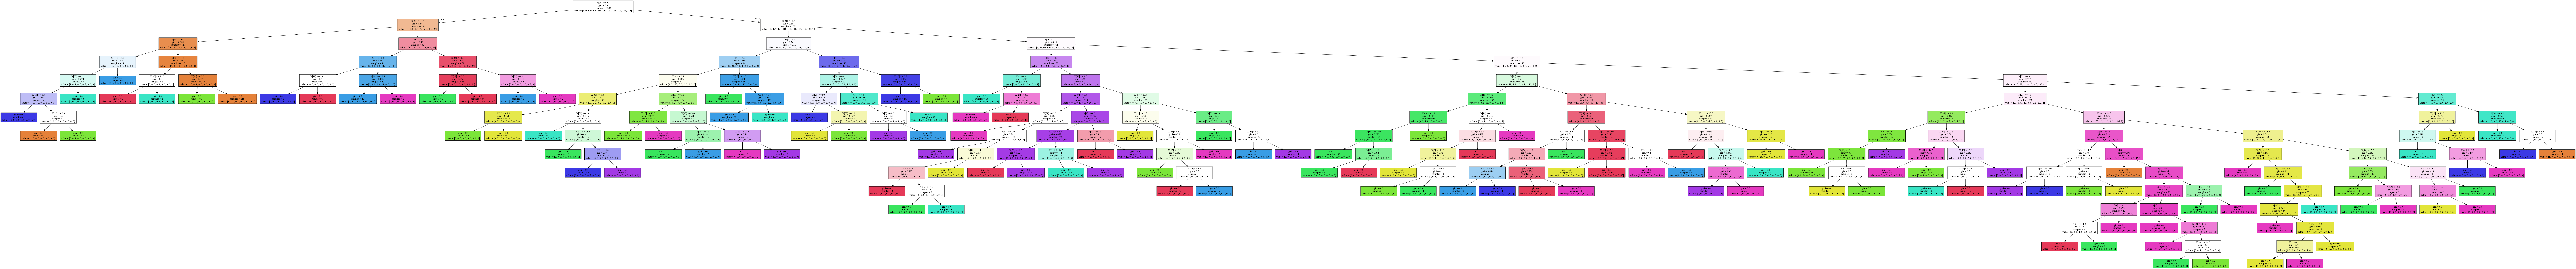

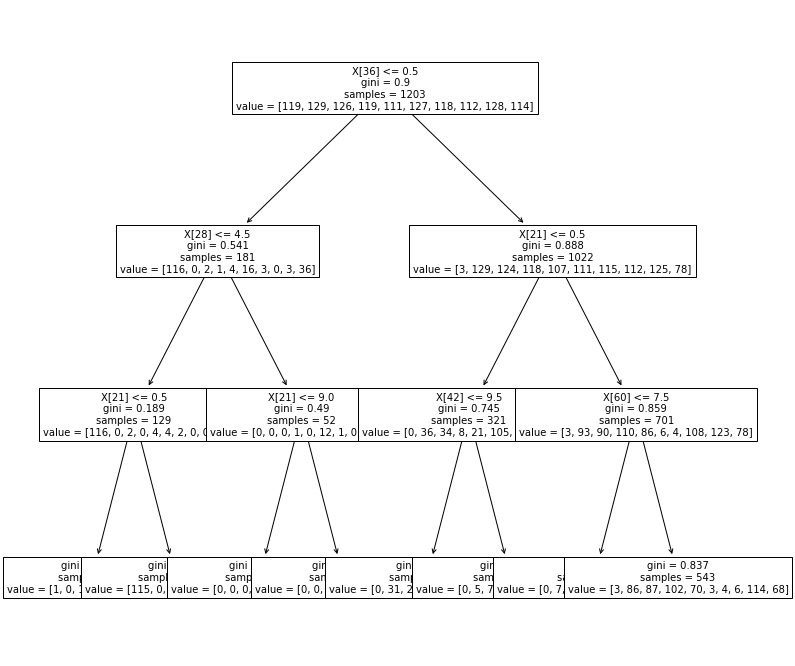

In [22]:
plt.figure(figsize=(12,12))
tree.plot_tree(clf, fontsize=10);


In [8]:
#Predict the response for test dataset
prediction = clf.predict(X_test)

In [9]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, prediction))

Accuracy: 0.8316498316498316


### Feature Selection

We need to split columns into two types of variables dependent(target variable) and independent variable(feature variables)

## References
***

[Decision Tree Classifier](http://mines.humanoriented.com/classes/2010/fall/csci568/portfolio_exports/lguo/decisionTree.html